<a href="https://colab.research.google.com/github/zhafarulmaahiy/pembelajaran-machine-Muhammad_zhafarul_Maahiy-2211533009/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [51]:
# membaca dataset
data = pd.read_csv('Churn_Modelling.csv')

In [52]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [53]:
# independent feature:
X = data.iloc[:, 3:13]

In [54]:
# dependent feature :
y = data.iloc[:, 13]

In [55]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [56]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [57]:
# Create dummy variables :
geography=pd.get_dummies(X["Geography"],drop_first=True)

In [58]:
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [59]:
# Concatenate the Data Frames :
X=pd.concat([X,geography,gender],axis=1)

In [60]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False


In [61]:
# Drop Unnecessary columns :
X=X.drop(['Geography','Gender'],axis=1)

In [62]:
# Memisahkan data menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Feature Scaling :
# Menerapkan standardisasi pada fitur untuk memastikan setiap fitur memiliki skala yang sama.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
# import library untuk perhitungan Artificial Neural Network

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# menambahkan layer pada ANN
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [64]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 72        
                                                                 
 dense_7 (Dense)             (None, 6)                 42        
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Compiling the ANN
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs= 100)

Epoch 1/100
536/536 [==============================] - 4s 5ms/step - loss: 0.5934 - accuracy: 0.7095 - val_loss: 0.4891 - val_accuracy: 0.7959
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4613 - accuracy: 0.7981 - val_loss: 0.4580 - val_accuracy: 0.7993
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4369 - accuracy: 0.8013 - val_loss: 0.4433 - val_accuracy: 0.8012
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4237 - accuracy: 0.8056 - val_loss: 0.4349 - val_accuracy: 0.8061
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4150 - accuracy: 0.8119 - val_loss: 0.4257 - val_accuracy: 0.8076
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4063 - accuracy: 0.8233 - val_loss: 0.4162 - val_accuracy: 0.8160
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8330 - val_loss: 0.4092 - val_accuracy: 0.8224

In [44]:
# list all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

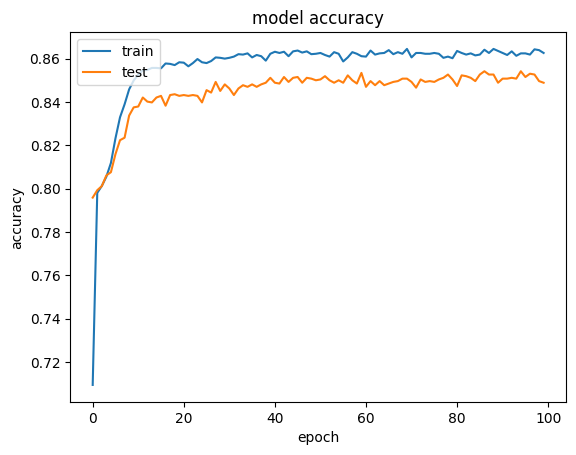

In [45]:
# nilai akurasi model terus meningkat setiap epoch pelatihan
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

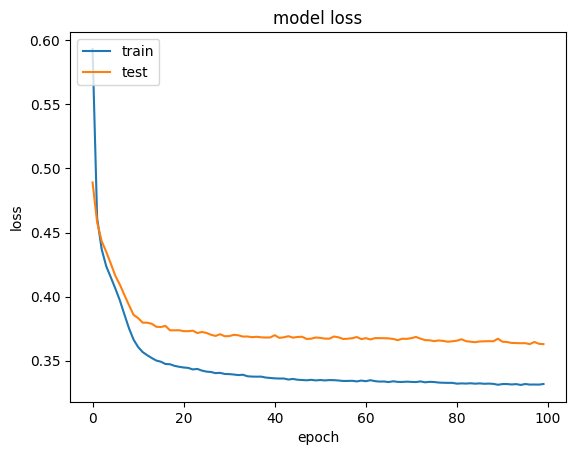

In [46]:
# menapilkan penurunan nilai model loss pada setitap epoch
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [48]:
# Confusion matrix adalah alat yang digunakan untuk mengevaluasi kinerja model klasifikasi pada machine learning.
# Ini adalah tabel yang memungkinkan kita untuk melihat bagaimana prediksi dari model sesuai dengan nilai sebenarnya dari data uji.
# Confusion matrix membantu kita untuk memahami seberapa baik model dalam mengklasifikasikan data ke dalam kelas yang benar.
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1526,   69],
       [ 216,  189]])

In [49]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8575